# Exploratory Data Analysis
1. Distribution of Male and Female
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by "Gender"
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [6]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#computer vision library
import cv2

#glob
from glob import glob

In [7]:
# extract path of male and female in crop_data folder and put them in a list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [9]:
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis=0)

df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_100.jpg,female
3,./crop_data/female\female_1002.jpg,female
4,./crop_data/female\female_1005.jpg,female


In [10]:
df.tail()

,filepath,gender
2170,./crop_data/male\male_994.jpg,male
2171,./crop_data/male\male_996.jpg,male
2172,./crop_data/male\male_997.jpg,male
2173,./crop_data/male\male_998.jpg,male
2174,./crop_data/male\male_999.jpg,male


In [11]:
df.shape

(4761, 2)

In [12]:
#it will take each image path, then return width of the image

def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [13]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this column

In [15]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,182
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


In [18]:
dist_gender = df['gender'].value_counts()
dist_gender

female    2586
male      2175
Name: gender, dtype: int64

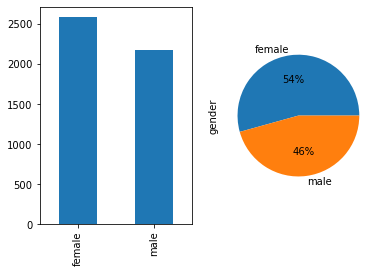

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1], autopct='%0.0f%%')
plt.show()

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


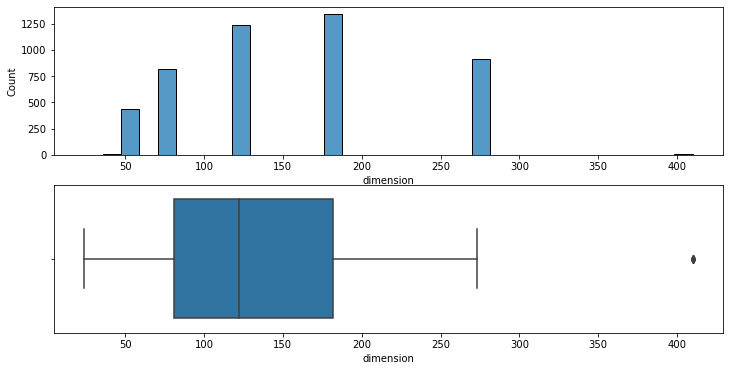

In [28]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by "Gender"
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
yo(df['dimension'])
plt.show()

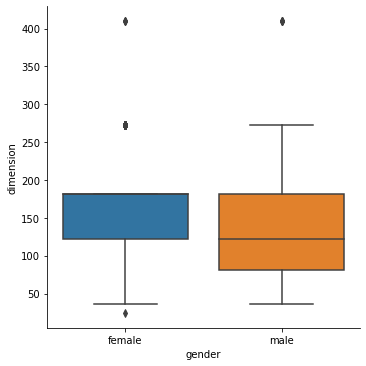

In [29]:
sns.catplot(data=df, x='gender', y='dimension', kind='box')

1. We have almost equal distribution of gender (numbers)
2. Most of the images are having dimension more then 60
3. Female most of the female images are HD compare to male images

---
- **Consider the image with dimensions more than 60**
- **Resize all the image into 100 x 100**

In [30]:
df_filter = df.query('dimension > 60')

In [31]:
df_filter.shape

(4320, 3)

In [32]:
df_filter['gender'].value_counts(normalize=True)

female    0.552315
male      0.447685
Name: gender, dtype: float64

#### Structure the image
- 100x 100

In [40]:
def structuring(path):
    try: 
        # step-1: read image
        img = cv2.imread(path) # BGR

        # step-2: convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # step-3: resize into 100x100 array
        size = gray.shape[0]

        if size >= 100:
            #cv2.INTER_AREA (SHRINK)
            gray_resize = cv2.resize(gray, (100,100), cv2.INTER_AREA)
        else:
            #cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray, (100, 100), cv2.INTER_CUBIC)

        # step-4: Flatten image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    except:
        return None

In [43]:
pd.options.mode.chained_assignment = None  # default='warn'
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 100 x 100

In [44]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female\female_0.jpg,female,273,"[200, 189, 188, 181, 184, 185, 179, 176, 189, ..."
1,./crop_data/female\female_1.jpg,female,182,"[31, 25, 35, 25, 31, 29, 30, 31, 34, 34, 49, 7..."
2,./crop_data/female\female_100.jpg,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./crop_data/female\female_1002.jpg,female,122,"[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,..."
4,./crop_data/female\female_1005.jpg,female,182,"[234, 236, 231, 231, 231, 185, 142, 111, 52, 4..."


In [51]:
data = df_filter['data'].apply(pd.Series)

In [52]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,31,25,35,25,31,29,30,31,34,34,...,45,27,22,30,22,35,20,35,65,19
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [53]:
data.columns = [f"pixel_{i}" for i in data.columns]

In [54]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,31,25,35,25,31,29,30,31,34,34,...,45,27,22,30,22,35,20,35,65,19
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


### Data Normalization

In [55]:
data = data/255.0
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.427451,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.176471,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.823529,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.258824,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.945098,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,0.470588,0.372549,0.431373,0.329412,0.396078,0.600000,0.447059,0.568627,0.631373,0.643137,...,0.447059,0.458824,0.486275,0.494118,0.509804,0.537255,0.537255,0.525490,0.482353,0.439216
2170,0.062745,0.070588,0.066667,0.062745,0.066667,0.062745,0.054902,0.058824,0.062745,0.074510,...,0.878431,0.898039,0.909804,0.913725,0.917647,0.921569,0.921569,0.917647,0.913725,0.909804
2172,0.694118,0.701961,0.705882,0.709804,0.709804,0.713725,0.717647,0.717647,0.709804,0.705882,...,0.560784,0.560784,0.552941,0.537255,0.545098,0.564706,0.592157,0.619608,0.650980,0.674510
2173,0.145098,0.145098,0.145098,0.145098,0.149020,0.156863,0.156863,0.152941,0.152941,0.152941,...,0.156863,0.160784,0.172549,0.188235,0.211765,0.239216,0.262745,0.278431,0.282353,0.278431


In [57]:
data['gender'] = df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


In [59]:
data.isnull().sum().sum()

0

In [61]:
## remove the missing values
data.dropna(inplace=True)

In [63]:
data.shape

(4320, 10001)

Save the data for future study

In [64]:
import pickle

In [65]:
pickle.dump(data, open('./data/data_images_100_100.pickle', mode='wb'))